# Feature Engineering

In this lesson we discuss some methods for *automated* feature engineering, specifically feature selection.

While these methods can produce useful results, they are but a single piece of of the feature engineering puzzle.

## Setup

In [1]:
import pandas as pd
import numpy as np
import pydataset

from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

tips = pydataset.data('tips')
tips['smoker'] = (tips.smoker == 'Yes').astype(int)
tips['dinner'] = (tips.time == 'Dinner').astype(int)

In [16]:
X = tips[['total_bill', 'size', 'smoker', 'dinner']]
y = tips.tip

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Select K Best

- uses an f regression test
- looks at each feature in isolation
- is a model with that feature better than no model at all

In [3]:
kbest = SelectKBest(f_regression, k=2)
kbest.fit(X_train_scaled, y_train)

SelectKBest(k=2, score_func=<function f_regression at 0x7fb1d87a6d30>)

In [4]:
kbest.get_support()

array([ True,  True, False, False])

In [5]:
X_train.columns[kbest.get_support()]

Index(['total_bill', 'size'], dtype='object')

In [6]:
X_kbest = kbest.transform(X_train_scaled)
X_kbest.shape

(195, 2)

Feature 0: 172.913650
Feature 1: 65.274770
Feature 2: 0.000154
Feature 3: 1.669530


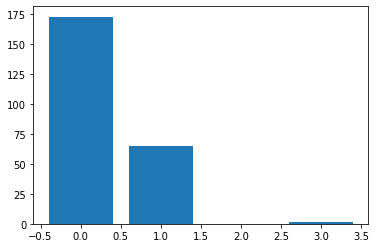

In [7]:
for i in range(len(kbest.scores_)):
    print('Feature %d: %f' % (i, kbest.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(kbest.scores_))], kbest.scores_)
plt.show()

<div style="border: 1px solid black; border-radius: 3px; background: palegreen; padding: .5em 1em;">
    <p style="font-size: 1.3em; font-weight: bold">Mini Exercise</p>
    <ol>
        <li>Use <code>pydataset</code> to load the <code>swiss</code> dataset.</li>
        <li>Split the swiss dataset into X and y, and train and test. The goal is to predict <code>Fertility</code>.</li>
        <li>Use <code>SelectKBest</code> to find the top 3 features that predict fertility in the swiss data set.</li>
    </ol>
</div>

In [8]:
swiss = pydataset.data('swiss')


In [9]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [20]:
X = swiss[['Agriculture', 'Examination', 'Education', 'Catholic','Infant.Mortality']]
y = swiss.Fertility

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train.columns

Index(['Agriculture', 'Examination', 'Education', 'Catholic',
       'Infant.Mortality'],
      dtype='object')

In [11]:
kbest = SelectKBest(f_regression, k=3)
kbest.fit(X_train_scaled, y_train)

SelectKBest(k=3, score_func=<function f_regression at 0x7fb1d87a6d30>)

In [12]:
X_train.columns[kbest.get_support()]

Index(['Examination', 'Education', 'Catholic'], dtype='object')

Feature 0: 2.383293
Feature 1: 14.806314
Feature 2: 15.085392
Feature 3: 9.737175
Feature 4: 3.215111


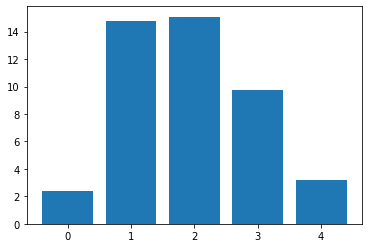

In [13]:
for i in range(len(kbest.scores_)):
    print('Feature %d: %f' % (i, kbest.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(kbest.scores_))], kbest.scores_)
plt.show()

## Recursive Feature Elimination

- Fits a model and eliminates the worst performing features
- More computationally expensive
- Looks at all the features together

In [18]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=3)
rfe.fit(X_train_scaled, y_train)
rfe.get_support()

array([ True,  True,  True, False])

In [19]:
rfe.ranking_

array([1, 1, 1, 2])

<div style="border: 1px solid black; border-radius: 3px; background: palegreen; padding: .5em 1em;">
    <p style="font-size: 1.3em; font-weight: bold">Mini Exercise</p>
    <ol>
        <li>Use <code>RFE</code> and <code>LinearRegression</code> to find the top 3 features that predict fertility in the swiss data set.</li>
        <li>Are the results different than what select k best gave you?</li>
    </ol>
</div>

In [22]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=1)
rfe.fit(X_train_scaled, y_train)
rfe.get_support()

array([False, False,  True, False, False])

In [23]:
rfe.ranking_

array([3, 5, 1, 2, 4])

In [24]:
pd.Series(rfe.ranking_, index = X_train.columns)

Agriculture         3
Examination         5
Education           1
Catholic            2
Infant.Mortality    4
dtype: int64

In [26]:
kbest.scores_

array([ 2.38329297, 14.80631438, 15.08539215,  9.73717543,  3.21511116])